[![Abrir no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Curso-IA-Instituto-Americas/Fundamentacao/blob/main/2-2-regressao-linear.ipynb)

In [2]:
# Importando bibliotecas necessárias
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Carregando a base de dados de diabetes
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Características (idade, IMC, etc.)
y = data.target  # Alvo: progressão da diabetes (valor contínuo)


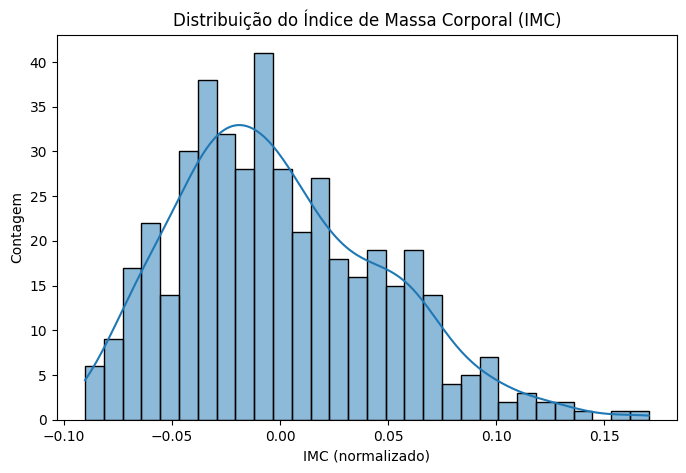

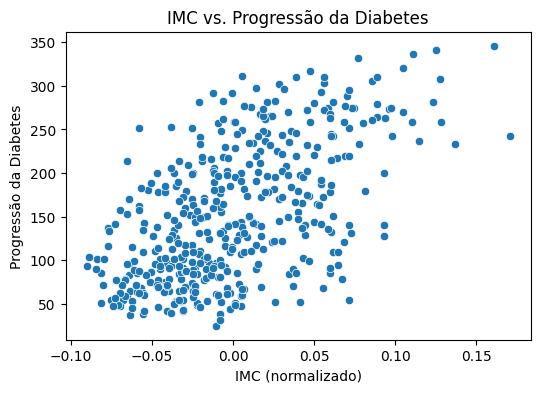

In [4]:
# Convertendo para DataFrame para facilitar a visualização
df = X.copy()
df['Progressão Diabetes'] = y
    
# Visualizando a distribuição do IMC (índice de massa corporal)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='bmi', bins=30, kde=True)
plt.title('Distribuição do Índice de Massa Corporal (IMC)')
plt.xlabel('IMC (normalizado)')
plt.ylabel('Contagem')
plt.show()
    
# Visualizando a relação entre IMC e progressão da diabetes
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='bmi', y='Progressão Diabetes')
plt.title('IMC vs. Progressão da Diabetes')
plt.xlabel('IMC (normalizado)')
plt.ylabel('Progressão da Diabetes')
plt.show()

In [5]:
# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Criando e treinando o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando métricas de desempenho
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


Erro Quadrático Médio (MSE): 2900.19 (indica o erro médio nas previsões)
R²: 0.45 (indica o quanto o modelo explica a variação nos dados, entre 0 e 1)


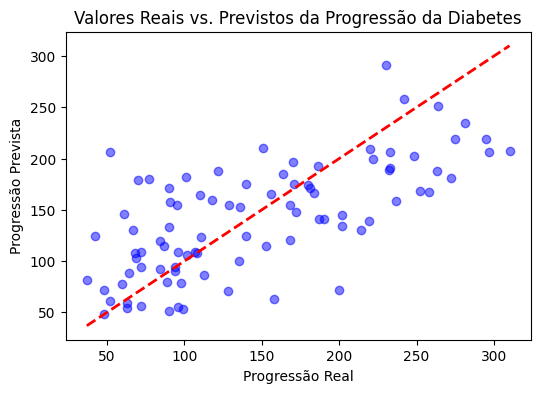

In [8]:
# Exibindo métricas
print(f"Erro Quadrático Médio (MSE): {mse:.2f} (indica o erro médio nas previsões)")
print(f"R²: {r2:.2f} (indica o quanto o modelo explica a variação nos dados, entre 0 e 1)")

# Visualizando valores reais vs. previstos
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Valores Reais vs. Previstos da Progressão da Diabetes')
plt.xlabel('Progressão Real')
plt.ylabel('Progressão Prevista')
plt.show()